In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" 
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)

In [3]:
def preprocess_adata(adata):

    # Ensure unique gene names to prevent reindexing errors
    adata.var_names_make_unique()
    
    # Mark mitochondrial and ribosomal genes
    adata.var['mt'] = adata.var_names.str.startswith("MT-")
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

    # Calculate QC metrics
    sc.pp.calculate_qc_metrics(
        adata,
        qc_vars=['mt', 'ribo'],
        percent_top=None,
        log1p=False,
        inplace=True
    )

    # Filter cells and genes
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=5)

    # Mitochondrial filtering
    adata = adata[adata.obs['pct_counts_mt']<5]
    
    return adata

In [4]:
# CO_EPI
adata1 = sc.read_mtx('Kong(2023)/CO_EPI.scp.matrix.mtx').T
genes1 = pd.read_csv('Kong(2023)/CO_EPI.scp.features.tsv', header=None, sep='\t')
adata1.var.index = genes1[0].values
barcodes1 = pd.read_csv('Kong(2023)/CO_EPI.scp.barcodes.tsv', header=None, sep='\t')
adata1.obs.index = barcodes1[0].values

In [5]:
adata1_raw = adata1.copy()

In [6]:
adata1 = preprocess_adata(adata1)

In [7]:
cell_names = adata1.obs_names
batch_tags = cell_names.str.extract(r"(^[^-]+)")[0]
unique_batches = batch_tags.unique()
print(unique_batches)

['N105446_L' 'N110204_E' 'N110204_L' 'N1108147_L' 'I117351_L' 'N117351_E'
 'N117351_L' 'N124246_E' 'N124246_L' 'N128208_E' 'N128208_L' 'N128400_E'
 'N128400_L' 'N128624_E' 'N128624_L' 'N164969_E' 'N164969_L' 'N178961_E'
 'N178961_L' 'H197396_N1' 'H197396_N2' 'H197396_N3' 'H197396_N4'
 'H139073_N' 'H180844_N1' 'H180844_N2' 'H106265_N' 'I175041_N1'
 'I175041_N2' 'I121881_E' 'I121881_L' 'I114902_N' 'N10_Epi_A' 'N10_Epi_B'
 'N10_LP_A' 'N10_LP_B' 'N11_Epi_A' 'N11_Epi_B' 'N11_LP_A' 'N11_LP_B'
 'N13_Epi_A' 'N13_Epi_B' 'N13_LP_A' 'N13_LP_B' 'N15_Epi_A' 'N15_Epi_B'
 'N15_LP_A' 'N15_LP_B' 'N16_Epi_A' 'N16_Epi_B' 'N16_LP_A' 'N16_LP_B'
 'N17_Epi_A' 'N17_Epi_B' 'N17_LP_A' 'N17_LP_B' 'N18_Epi_A' 'N18_Epi_B'
 'N18_LP_A' 'N18_LP_B' 'N20_Epi_A' 'N20_Epi_B' 'N20_LP_A' 'N20_LP_B'
 'N21_Epi_A' 'N21_Epi_B' 'N21_LP_A' 'N21_LP_B' 'N46_Epi_A' 'N46_Epi_B'
 'N46_LP_A' 'N46_LP_B' 'N51_Epi_A' 'N51_Epi_B' 'N51_LP_A' 'N51_LP_B'
 'N8_Epi_A' 'N8_Epi_B' 'N8_LP_A' 'N8_LP_B' 'N175041_N1' 'N175041_N2'
 'N104152_N' 'N1547

In [8]:
adata1 = adata1.copy()
adata1.obs["batch"] = batch_tags.values

In [9]:
sc.pp.highly_variable_genes(adata1, n_top_genes = 2500)
adata1.raw = adata1.copy()
adata1 = adata1[:, adata1.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


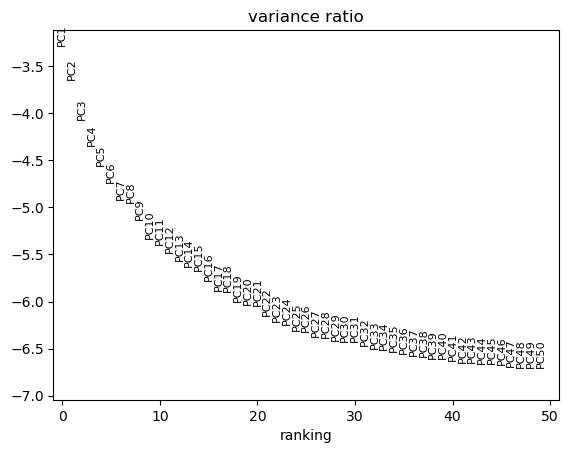

In [10]:
sc.pp.scale(adata1, max_value=10)
sc.tl.pca(adata1, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata1, log=True, n_pcs = 50)

In [11]:
sc.external.pp.harmony_integrate(adata1, key='batch', max_iter_harmony = 20)
sc.pp.neighbors(adata1, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata1)

2025-07-15 07:16:15,026 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 07:16:29,703 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 07:16:30,260 - harmonypy - INFO - Iteration 1 of 20
2025-07-15 11:28:43,054 - harmonypy - INFO - Iteration 2 of 20
2025-07-15 11:30:02,246 - harmonypy - INFO - Iteration 3 of 20
2025-07-15 11:31:19,617 - harmonypy - INFO - Iteration 4 of 20
2025-07-15 11:32:36,914 - harmonypy - INFO - Iteration 5 of 20
2025-07-15 11:33:44,991 - harmonypy - INFO - Iteration 6 of 20
2025-07-15 11:34:52,512 - harmonypy - INFO - Iteration 7 of 20
2025-07-15 11:36:03,165 - harmonypy - INFO - Iteration 8 of 20
2025-07-15 11:36:42,809 - harmonypy - INFO - Iteration 9 of 20
2025-07-15 11:37:44,914 - harmonypy - INFO - Iteration 10 of 20
2025-07-15 11:38:17,345 - harmonypy - INFO - Iteration 11 of 20
2025-07-15 11:38:48,291 - harmonypy - INFO - Iteration 12 of 20
2025-07-15 11:39:19,720 - harmonypy - INFO - Iteration 13 of

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Get the original magma colormap
magma = plt.cm.get_cmap('magma', 256)

# Convert to array and prepend grey
magma_colors = magma(np.linspace(0, 1, 256))
grey = np.array([[0.8, 0.8, 0.8, 1.0]])  # RGBA for light grey

# Combine: grey for near-zero, then rest of magma
new_colors = np.vstack((grey, magma_colors[20:]))  # skip darkest part of magma
custom_cmap1 = ListedColormap(new_colors)

C:\Users\아이디어패드\AppData\Local\Temp\ipykernel_18868\2828510362.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma = plt.cm.get_cmap('magma', 256)


C:\Users\아이디어패드\AppData\Local\Temp\ipykernel_18868\927664506.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata1, resolution = 0.5)


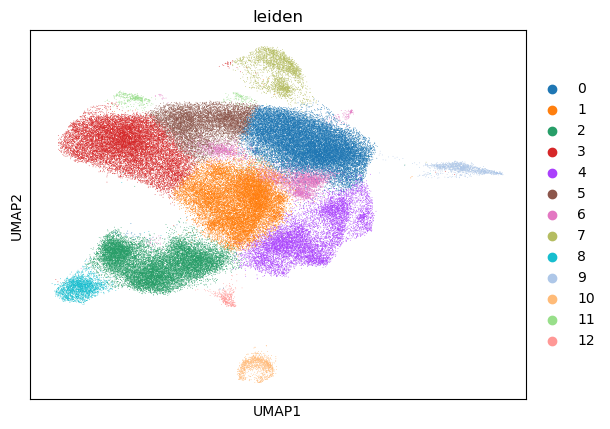

In [13]:
sc.tl.leiden(adata1, resolution = 0.5)
sc.pl.umap(adata1, color=['leiden'])

In [14]:
# CO_IMM
adata2 = sc.read_mtx('Kong(2023)/CO_IMM.scp.matrix.mtx').T
genes2 = pd.read_csv('Kong(2023)/CO_IMM.scp.features.tsv', header=None, sep='\t')
adata2.var.index = genes2[0].values
barcodes2 = pd.read_csv('Kong(2023)/CO_IMM.scp.barcodes.tsv', header=None, sep='\t')
adata2.obs.index = barcodes2[0].values

In [15]:
adata2_raw = adata2.copy()
adata2 = preprocess_adata(adata2)

In [16]:
cell_names2 = adata2.obs_names
batch_tags2 = cell_names2.str.extract(r"(^[^-]+)")[0]
adata2 = adata2.copy()
adata2.obs["batch"] = batch_tags2.values

In [17]:
sc.pp.highly_variable_genes(adata2, n_top_genes = 2500)
adata2.raw = adata2.copy()
adata2 = adata2[:, adata2.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


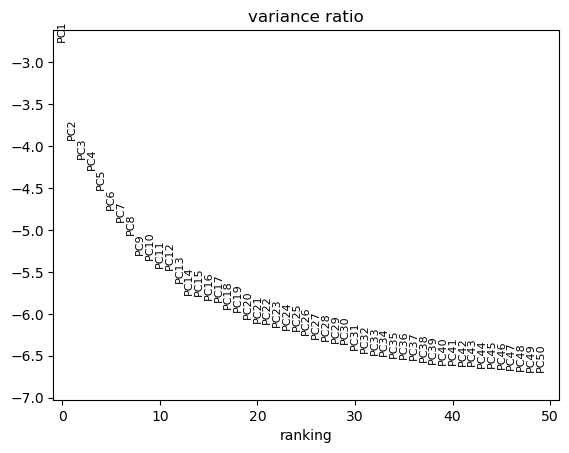

In [18]:
sc.pp.scale(adata2, max_value=10)
sc.tl.pca(adata2, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata2, log=True, n_pcs = 50)

In [19]:
sc.external.pp.harmony_integrate(adata2, key='batch', max_iter_harmony = 20)
sc.pp.neighbors(adata2, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata2)

2025-07-15 11:44:19,895 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 11:44:32,473 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 11:44:33,261 - harmonypy - INFO - Iteration 1 of 20
2025-07-15 11:46:22,957 - harmonypy - INFO - Iteration 2 of 20
2025-07-15 11:48:10,523 - harmonypy - INFO - Iteration 3 of 20
2025-07-15 11:50:02,166 - harmonypy - INFO - Iteration 4 of 20
2025-07-15 11:51:01,509 - harmonypy - INFO - Iteration 5 of 20
2025-07-15 11:51:50,759 - harmonypy - INFO - Iteration 6 of 20
2025-07-15 11:52:35,110 - harmonypy - INFO - Iteration 7 of 20
2025-07-15 11:53:13,793 - harmonypy - INFO - Iteration 8 of 20
2025-07-15 11:53:52,410 - harmonypy - INFO - Iteration 9 of 20
2025-07-15 11:54:31,119 - harmonypy - INFO - Iteration 10 of 20
2025-07-15 11:55:10,077 - harmonypy - INFO - Iteration 11 of 20
2025-07-15 11:55:47,989 - harmonypy - INFO - Iteration 12 of 20
2025-07-15 11:56:27,085 - harmonypy - INFO - Iteration 13 of

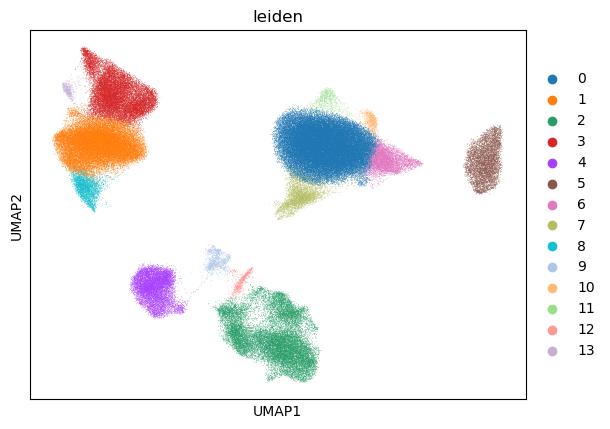

In [20]:
sc.tl.leiden(adata2, resolution = 0.5)
sc.pl.umap(adata2, color=['leiden'])

In [21]:
# CO_STR
adata3 = sc.read_mtx('Kong(2023)/CO_STR.scp.matrix.mtx').T
genes3 = pd.read_csv('Kong(2023)/CO_STR.scp.features.tsv', header=None, sep='\t')
adata3.var.index = genes3[0].values
barcodes3 = pd.read_csv('Kong(2023)/CO_STR.scp.barcodes.tsv', header=None, sep='\t')
adata3.obs.index = barcodes3[0].values

In [22]:
adata3_raw = adata3.copy()
adata3 = preprocess_adata(adata3)

In [23]:
cell_names3 = adata3.obs_names
batch_tags3 = cell_names3.str.extract(r"(^[^-]+)")[0]
adata3 = adata3.copy()
adata3.obs["batch"] = batch_tags3.values

In [24]:
sc.pp.highly_variable_genes(adata3, n_top_genes = 2500)
adata3.raw = adata3.copy()
adata3 = adata3[:, adata3.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


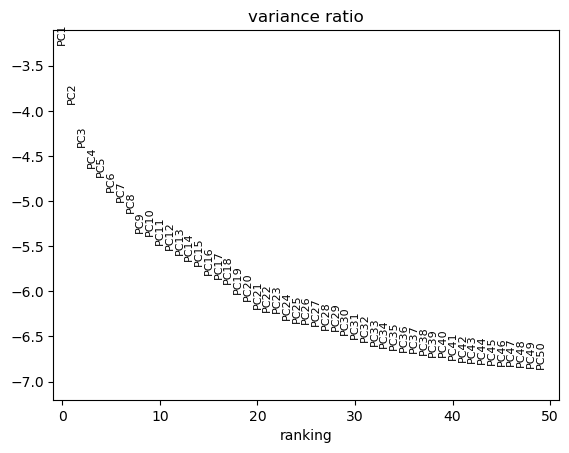

In [25]:
sc.pp.scale(adata3, max_value=10)
sc.tl.pca(adata3, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata3, log=True, n_pcs = 50)

In [26]:
sc.external.pp.harmony_integrate(adata3, key='batch', max_iter_harmony = 20)
sc.pp.neighbors(adata3, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata3)

2025-07-15 12:01:24,849 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 12:01:28,990 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 12:01:29,219 - harmonypy - INFO - Iteration 1 of 20
2025-07-15 12:01:53,515 - harmonypy - INFO - Iteration 2 of 20
2025-07-15 12:02:18,078 - harmonypy - INFO - Iteration 3 of 20
2025-07-15 12:02:41,470 - harmonypy - INFO - Iteration 4 of 20
2025-07-15 12:03:03,976 - harmonypy - INFO - Iteration 5 of 20
2025-07-15 12:03:27,316 - harmonypy - INFO - Iteration 6 of 20
2025-07-15 12:03:50,559 - harmonypy - INFO - Iteration 7 of 20
2025-07-15 12:04:12,855 - harmonypy - INFO - Iteration 8 of 20
2025-07-15 12:04:27,730 - harmonypy - INFO - Iteration 9 of 20
2025-07-15 12:04:50,162 - harmonypy - INFO - Iteration 10 of 20
2025-07-15 12:05:03,546 - harmonypy - INFO - Iteration 11 of 20
2025-07-15 12:05:22,662 - harmonypy - INFO - Iteration 12 of 20
2025-07-15 12:05:37,313 - harmonypy - INFO - Converged after

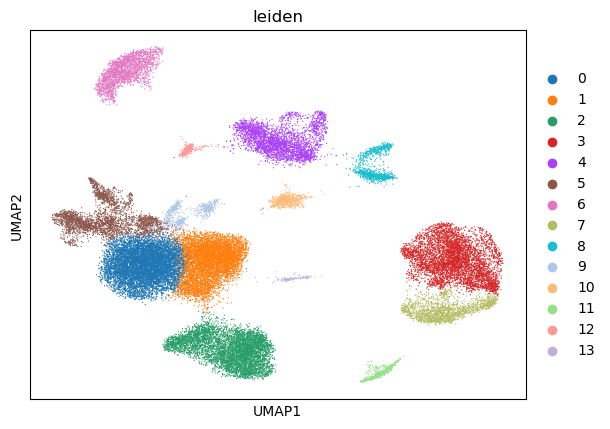

In [27]:
sc.tl.leiden(adata3, resolution = 0.5)
sc.pl.umap(adata3, color=['leiden'])

In [28]:
# TI_EPI
adata4 = sc.read_mtx('Kong(2023)/TI_EPI.scp.matrix.mtx').T
genes4 = pd.read_csv('Kong(2023)/TI_EPI.scp.features.tsv', header=None, sep='\t')
adata4.var.index = genes4[0].values
barcodes4 = pd.read_csv('Kong(2023)/TI_EPI.scp.barcodes.tsv', header=None, sep='\t')
adata4.obs.index = barcodes4[0].values

In [29]:
adata4_raw = adata4.copy()
adata4 = preprocess_adata(adata4)

In [30]:
cell_names4 = adata4.obs_names
batch_tags4 = cell_names4.str.extract(r"(^[^-]+)")[0]
adata4 = adata4.copy()
adata4.obs["batch"] = batch_tags4.values

In [31]:
sc.pp.highly_variable_genes(adata4, n_top_genes = 2500)
adata4.raw = adata4.copy()
adata4 = adata4[:, adata4.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


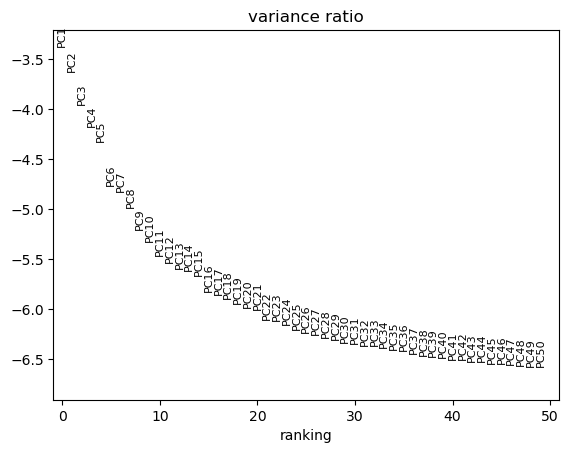

In [32]:
sc.pp.scale(adata4, max_value=10)
sc.tl.pca(adata4, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata4, log=True, n_pcs = 50)

In [33]:
sc.external.pp.harmony_integrate(adata4, key='batch', max_iter_harmony = 20)
sc.pp.neighbors(adata4, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata4)

2025-07-15 12:08:48,436 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 12:09:04,401 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 12:09:05,498 - harmonypy - INFO - Iteration 1 of 20
2025-07-15 12:11:15,373 - harmonypy - INFO - Iteration 2 of 20
2025-07-15 12:13:27,906 - harmonypy - INFO - Iteration 3 of 20
2025-07-15 12:15:34,748 - harmonypy - INFO - Iteration 4 of 20
2025-07-15 12:17:46,470 - harmonypy - INFO - Iteration 5 of 20
2025-07-15 12:20:01,102 - harmonypy - INFO - Iteration 6 of 20
2025-07-15 12:22:03,929 - harmonypy - INFO - Iteration 7 of 20
2025-07-15 12:24:21,526 - harmonypy - INFO - Iteration 8 of 20
2025-07-15 12:25:57,817 - harmonypy - INFO - Iteration 9 of 20
2025-07-15 12:28:18,631 - harmonypy - INFO - Iteration 10 of 20
2025-07-15 12:30:15,324 - harmonypy - INFO - Iteration 11 of 20
2025-07-15 12:31:30,857 - harmonypy - INFO - Iteration 12 of 20
2025-07-15 12:32:42,139 - harmonypy - INFO - Iteration 13 of

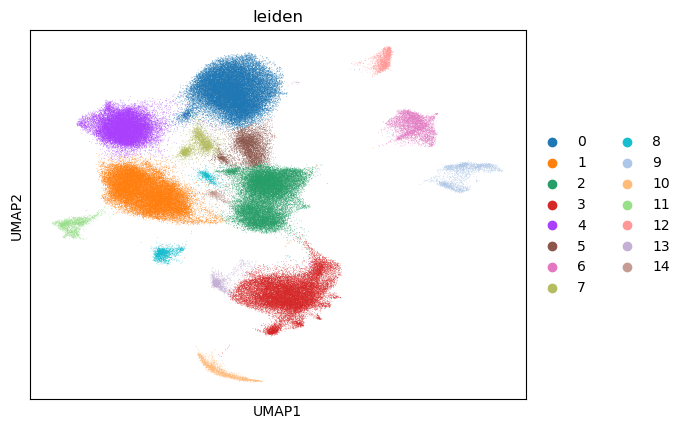

In [34]:
sc.tl.leiden(adata4, resolution = 0.5)
sc.pl.umap(adata4, color=['leiden'])

In [35]:
# TI_IMM
adata5 = sc.read_mtx('Kong(2023)/TI_IMM.scp.matrix.mtx').T
genes5 = pd.read_csv('Kong(2023)/TI_IMM.scp.features.tsv', header=None, sep='\t')
adata5.var.index = genes5[0].values
barcodes5 = pd.read_csv('Kong(2023)/TI_IMM.scp.barcodes.tsv', header=None, sep='\t')
adata5.obs.index = barcodes5[0].values

In [36]:
adata5_raw = adata5.copy()
adata5 = preprocess_adata(adata5)

In [37]:
cell_names5 = adata5.obs_names
batch_tags5 = cell_names5.str.extract(r"(^[^-]+)")[0]
adata5 = adata5.copy()
adata5.obs["batch"] = batch_tags5.values

In [38]:
sc.pp.highly_variable_genes(adata5, n_top_genes = 2500)
adata5.raw = adata5.copy()
adata5 = adata5[:, adata5.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


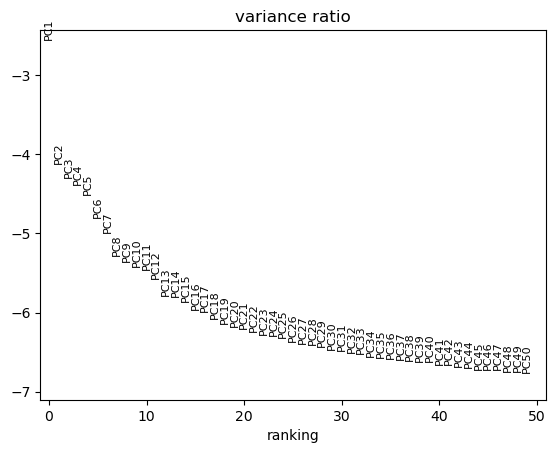

In [39]:
sc.pp.scale(adata5, max_value=10)
sc.tl.pca(adata5, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata5, log=True, n_pcs = 50)

In [40]:
sc.external.pp.harmony_integrate(adata5, key='batch', max_iter_harmony = 20)
sc.pp.neighbors(adata5, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata5)

2025-07-15 12:43:05,900 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 12:43:23,500 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 12:43:24,773 - harmonypy - INFO - Iteration 1 of 20
2025-07-15 12:46:17,618 - harmonypy - INFO - Iteration 2 of 20
2025-07-15 12:49:09,930 - harmonypy - INFO - Iteration 3 of 20
2025-07-15 12:52:04,663 - harmonypy - INFO - Iteration 4 of 20
2025-07-15 12:55:06,807 - harmonypy - INFO - Iteration 5 of 20
2025-07-15 12:57:43,616 - harmonypy - INFO - Iteration 6 of 20
2025-07-15 12:59:37,114 - harmonypy - INFO - Iteration 7 of 20
2025-07-15 13:05:24,170 - harmonypy - INFO - Iteration 8 of 20
2025-07-15 13:06:27,726 - harmonypy - INFO - Iteration 9 of 20
2025-07-15 13:07:25,436 - harmonypy - INFO - Iteration 10 of 20
2025-07-15 13:08:30,416 - harmonypy - INFO - Iteration 11 of 20
2025-07-15 13:10:58,162 - harmonypy - INFO - Iteration 12 of 20
2025-07-15 13:12:04,142 - harmonypy - INFO - Iteration 13 of

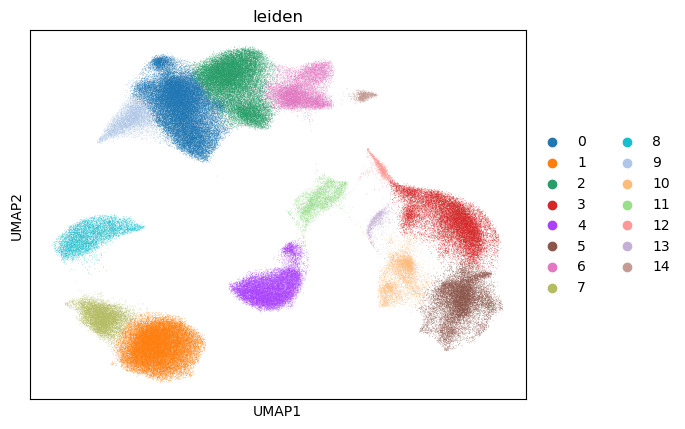

In [41]:
sc.tl.leiden(adata5, resolution = 0.5)
sc.pl.umap(adata5, color=['leiden'])

In [42]:
# TI_STR
adata6 = sc.read_mtx('Kong(2023)/TI_STR.scp.matrix.mtx').T
genes6 = pd.read_csv('Kong(2023)/TI_STR.scp.features.tsv', header=None, sep='\t')
adata6.var.index = genes6[0].values
barcodes6 = pd.read_csv('Kong(2023)/TI_STR.scp.barcodes.tsv', header=None, sep='\t')
adata6.obs.index = barcodes6[0].values

In [43]:
adata6_raw = adata6.copy()
adata6 = preprocess_adata(adata6)

In [44]:
cell_names6 = adata6.obs_names
batch_tags6 = cell_names6.str.extract(r"(^[^-]+)")[0]
adata6 = adata6.copy()
adata6.obs["batch"] = batch_tags6.values

In [45]:
sc.pp.highly_variable_genes(adata6, n_top_genes = 2500)
adata6.raw = adata6.copy()
adata6 = adata6[:, adata6.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


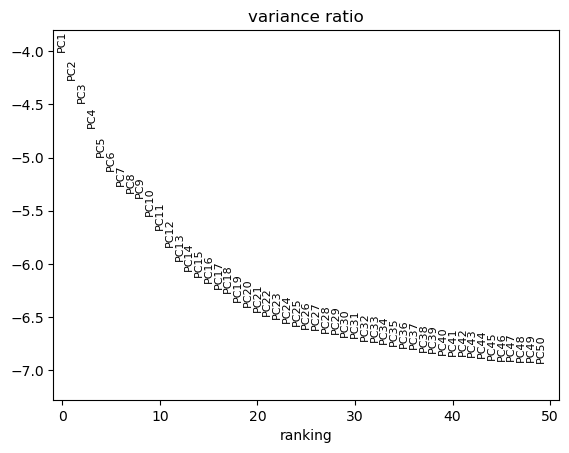

In [46]:
sc.pp.scale(adata6, max_value=10)
sc.tl.pca(adata6, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata6, log=True, n_pcs = 50)

In [47]:
sc.external.pp.harmony_integrate(adata6, key='batch', max_iter_harmony = 20)
sc.pp.neighbors(adata6, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata6)

2025-07-15 13:18:08,884 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 13:18:15,875 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 13:18:16,290 - harmonypy - INFO - Iteration 1 of 20
2025-07-15 13:19:04,408 - harmonypy - INFO - Iteration 2 of 20
2025-07-15 13:19:52,829 - harmonypy - INFO - Iteration 3 of 20
2025-07-15 13:20:41,781 - harmonypy - INFO - Iteration 4 of 20
2025-07-15 13:21:30,904 - harmonypy - INFO - Iteration 5 of 20
2025-07-15 13:22:19,419 - harmonypy - INFO - Iteration 6 of 20
2025-07-15 13:23:07,203 - harmonypy - INFO - Iteration 7 of 20
2025-07-15 13:23:56,122 - harmonypy - INFO - Iteration 8 of 20
2025-07-15 13:24:30,568 - harmonypy - INFO - Iteration 9 of 20
2025-07-15 13:25:19,299 - harmonypy - INFO - Iteration 10 of 20
2025-07-15 13:26:06,755 - harmonypy - INFO - Iteration 11 of 20
2025-07-15 13:26:49,184 - harmonypy - INFO - Iteration 12 of 20
2025-07-15 13:27:14,786 - harmonypy - INFO - Iteration 13 of

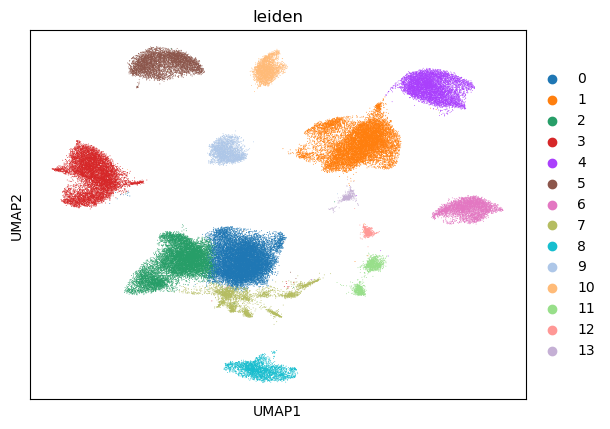

In [48]:
sc.tl.leiden(adata6, resolution = 0.5)
sc.pl.umap(adata6, color=['leiden'])

In [49]:
# Colon
adata_CO_EPI = adata1_raw.copy()
adata_CO_IMM = adata2_raw.copy()
adata_CO_STR = adata3_raw.copy()

adata_colon = sc.concat((preprocess_adata(adata) for adata in [adata_CO_EPI, adata_CO_IMM, adata_CO_STR]), 
                           label='batch', 
                           keys=['EPI', 'IMM', 'STR'])

In [50]:
adata_colon.obs_names_make_unique()

adata_colon_raw = adata_colon.copy()

In [51]:
c_cell_names = adata_colon.obs_names
c_batch_tags = c_cell_names.str.extract(r"(^[^-]+)")[0]
adata_colon = adata_colon.copy()
adata_colon.obs["id"] = c_batch_tags.values

In [52]:
sc.pp.highly_variable_genes(adata_colon, flavor='seurat', batch_key='id', n_top_genes=2000)
adata_colon.raw = adata_colon.copy()
adata_colon = adata_colon[:, adata_colon.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


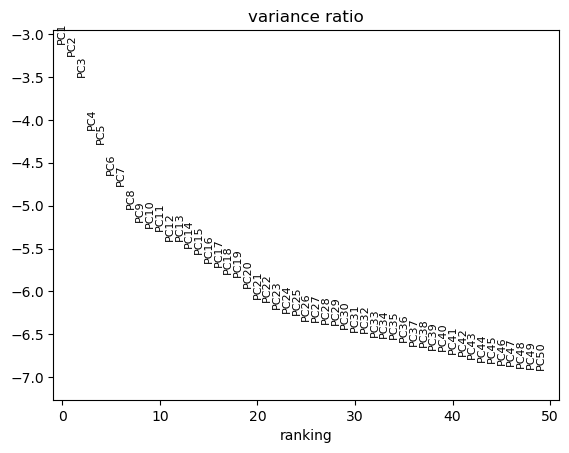

In [53]:
sc.pp.scale(adata_colon, max_value=10)
sc.tl.pca(adata_colon, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_colon, log=True, n_pcs = 50)

In [54]:
sc.external.pp.harmony_integrate(adata_colon, key='id')
sc.pp.neighbors(adata_colon, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata_colon)

2025-07-15 14:24:34,704 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 14:25:03,982 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 14:25:05,573 - harmonypy - INFO - Iteration 1 of 10
2025-07-15 14:29:10,056 - harmonypy - INFO - Iteration 2 of 10
2025-07-15 14:33:13,272 - harmonypy - INFO - Iteration 3 of 10
2025-07-15 14:37:15,111 - harmonypy - INFO - Iteration 4 of 10
2025-07-15 14:41:19,124 - harmonypy - INFO - Iteration 5 of 10
2025-07-15 14:45:23,609 - harmonypy - INFO - Converged after 5 iterations


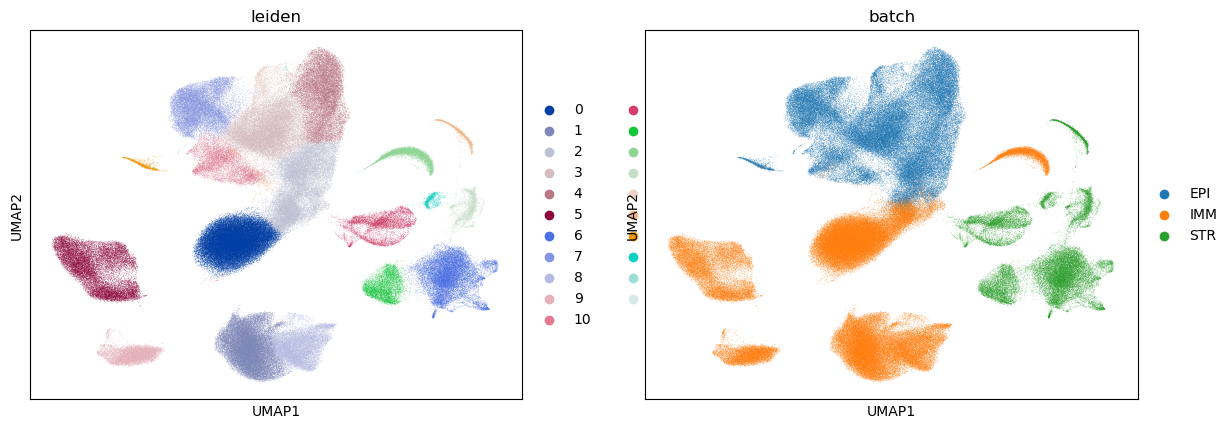

In [55]:
sc.tl.leiden(adata_colon, resolution=0.5)
sc.pl.umap(adata_colon, color=['leiden', 'batch'])

In [56]:
# Terminal ileum
adata_TI_EPI = adata4_raw.copy()
adata_TI_IMM = adata5_raw.copy()
adata_TI_STR = adata6_raw.copy()

adata_TI = sc.concat((preprocess_adata(adata) for adata in [adata_TI_EPI, adata_TI_IMM, adata_TI_STR]), 
                           label='batch', 
                           keys=['EPI', 'IMM', 'STR'])

In [57]:
adata_TI.obs_names_make_unique()

adata_TI_raw = adata_TI.copy()

In [58]:
t_cell_names = adata_TI.obs_names
t_batch_tags = t_cell_names.str.extract(r"(^[^-]+)")[0]
adata_TI = adata_TI.copy()
adata_TI.obs["id"] = t_batch_tags.values

In [59]:
sc.pp.highly_variable_genes(adata_TI, flavor='seurat', batch_key='id', n_top_genes=2000)
adata_TI.raw = adata_TI.copy()
adata_TI = adata_TI[:, adata_TI.var.highly_variable].copy()

C:\Anaconda3\envs\NIM_Kim\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


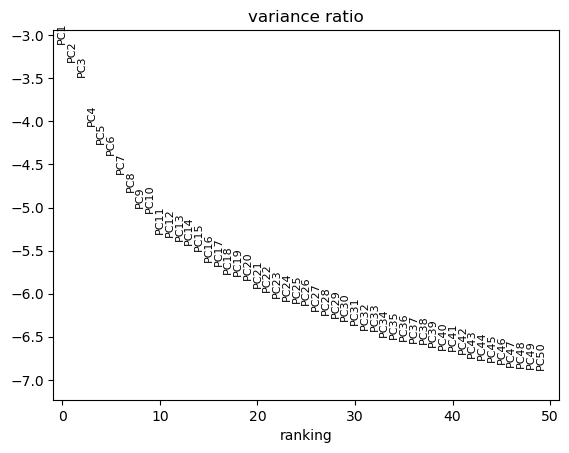

In [60]:
sc.pp.scale(adata_TI, max_value=10)
sc.tl.pca(adata_TI, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_TI, log=True, n_pcs = 50)

In [61]:
sc.external.pp.harmony_integrate(adata_TI, key='id')
sc.pp.neighbors(adata_TI, n_neighbors = 30, n_pcs = 50, use_rep='X_pca_harmony')
sc.tl.umap(adata_TI)

2025-07-15 15:02:37,587 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-15 15:03:21,290 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-15 15:03:23,707 - harmonypy - INFO - Iteration 1 of 10
2025-07-15 15:10:16,534 - harmonypy - INFO - Iteration 2 of 10
2025-07-15 15:17:02,103 - harmonypy - INFO - Iteration 3 of 10
2025-07-15 15:23:48,676 - harmonypy - INFO - Iteration 4 of 10
2025-07-15 15:30:35,421 - harmonypy - INFO - Iteration 5 of 10
2025-07-15 15:37:21,988 - harmonypy - INFO - Iteration 6 of 10
2025-07-15 15:44:09,968 - harmonypy - INFO - Iteration 7 of 10
2025-07-15 15:51:09,350 - harmonypy - INFO - Converged after 7 iterations


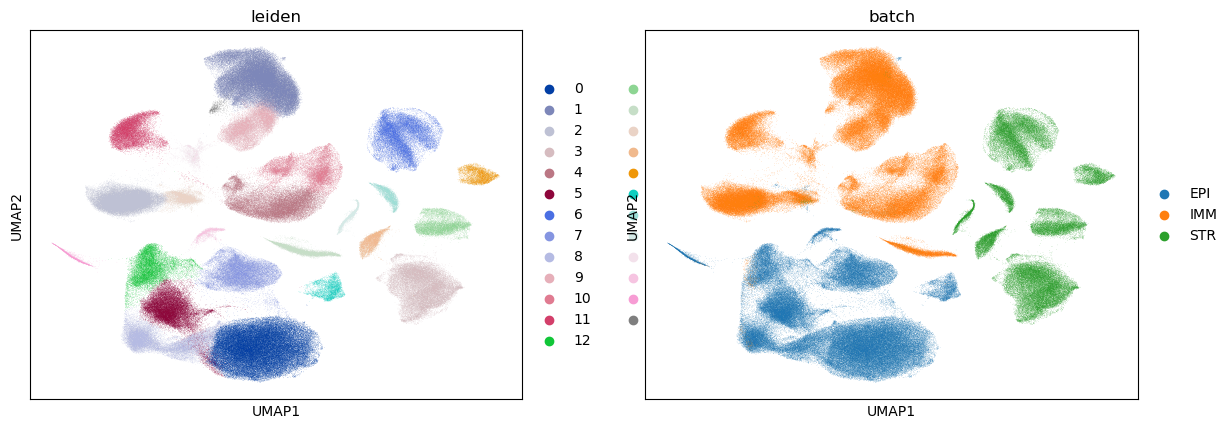

In [62]:
sc.tl.leiden(adata_TI, resolution=0.5)
sc.pl.umap(adata_TI, color=['leiden', 'batch'])